In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


data = pd.read_csv("C:\\Users\\Sebastian\\Documents\\Datasets\\healthcare-dataset-stroke-data.csv")
# Display the first few rows of the dataset
print(data.head())

# Load the dataset
data = pd.read_csv("C:\\Users\\Sebastian\\Documents\\Datasets\\healthcare-dataset-stroke-data.csv")
# Drop rows with NaN or empty values
data_cleaned = data.dropna()


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [2]:
# Separate features and target variable in the cleaned dataset
X_cleaned = data_cleaned.drop(columns=['stroke'])
y_cleaned = data_cleaned['stroke']
# Split the cleaned dataset into train and test sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned,
y_cleaned, test_size=0.3, random_state=42)
# Define preprocessing steps for numeric and categorical features
numeric_features = X_cleaned.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X_cleaned.select_dtypes(include=['object']).columns


In [3]:
numeric_transformer = Pipeline(steps=[
 ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
 ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
 transformers=[
 ('num', numeric_transformer, numeric_features),
 ('cat', categorical_transformer, categorical_features)
 ])

In [4]:
# Define SMOTE step in the pipeline
smote = SMOTE(random_state=42)
# Combine preprocessing, feature engineering, and SMOTE into a pipeline with SMOTE
pipeline_with_smote = ImbPipeline(steps=[
 ('preprocessor', preprocessor),
 ('poly', PolynomialFeatures(degree=2)), # Add polynomial features up to degree 2
 ('smote', smote), # Apply SMOTE
 ('classifier', LogisticRegression())
])
# Fit the pipeline with SMOTE on the training data
pipeline_with_smote.fit(X_train_cleaned, y_train_cleaned)
# Predict on the test data with SMOTE
y_pred_smote = pipeline_with_smote.predict(X_test_cleaned)

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Evaluate the model with SMOTE

accuracy_smote = accuracy_score(y_test_cleaned, y_pred_smote)
precision_smote = precision_score(y_test_cleaned, y_pred_smote)
recall_smote = recall_score(y_test_cleaned, y_pred_smote)
f1_smote = f1_score(y_test_cleaned, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test_cleaned, y_pred_smote)
# Print evaluation metrics with SMOTE
print("Evaluation Metrics with SMOTE:")
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1-score:", f1_smote)
print("Confusion Matrix:\n", conf_matrix_smote)
print()


Evaluation Metrics with SMOTE:
Accuracy: 0.7759674134419552
Precision: 0.12931034482758622
Recall: 0.625
F1-score: 0.2142857142857143
Confusion Matrix:
 [[1098  303]
 [  27   45]]



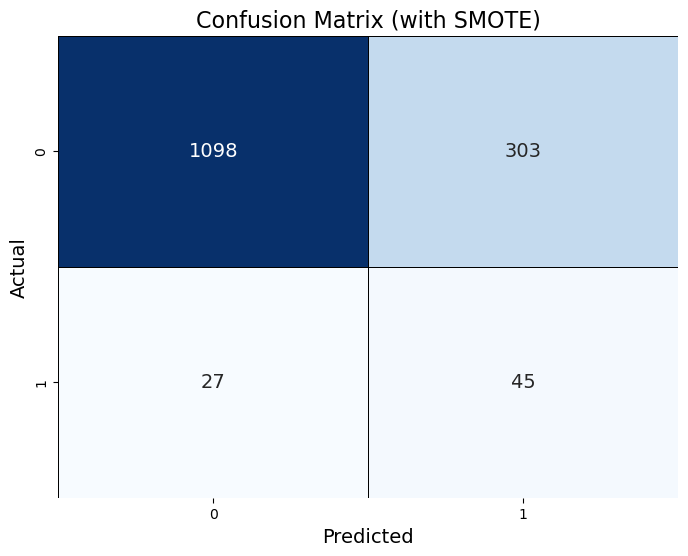

In [6]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
 annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix (with SMOTE)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()




In [7]:
pipeline_without_smote = Pipeline(steps=[
 ('preprocessor', preprocessor),
 ('poly', PolynomialFeatures(degree=2)), # Add polynomial features up to degree 2
 ('classifier', LogisticRegression())
])

# Fit the pipeline without SMOTE on the training data
pipeline_without_smote.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test data without SMOTE
y_pred_no_smote = pipeline_without_smote.predict(X_test_cleaned)
# Evaluate the model without SMOTE
accuracy_no_smote = accuracy_score(y_test_cleaned, y_pred_no_smote)
precision_no_smote = precision_score(y_test_cleaned, y_pred_no_smote)
recall_no_smote = recall_score(y_test_cleaned, y_pred_no_smote)
f1_no_smote = f1_score(y_test_cleaned, y_pred_no_smote)
conf_matrix_no_smote = confusion_matrix(y_test_cleaned, y_pred_no_smote)

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics without SMOTE:
Accuracy: 0.9484046164290564
Precision: 0.3
Recall: 0.041666666666666664
F1-score: 0.07317073170731707
Confusion Matrix:
 [[1394    7]
 [  69    3]]



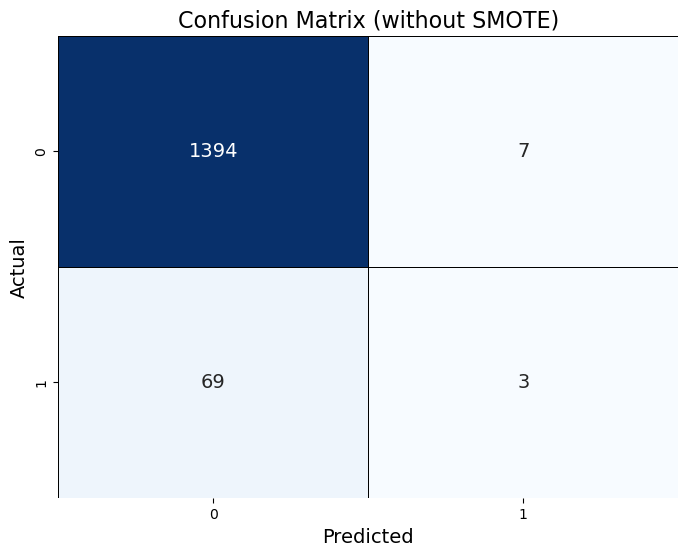

In [8]:
# Print evaluation metrics without SMOTE
print("Evaluation Metrics without SMOTE:")
print("Accuracy:", accuracy_no_smote)
print("Precision:", precision_no_smote)
print("Recall:", recall_no_smote)
print("F1-score:", f1_no_smote)
print("Confusion Matrix:\n", conf_matrix_no_smote)
print()
# Plot the confusion matrix without SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_no_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
 annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix (without SMOTE)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


c:\Users\Sebastian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


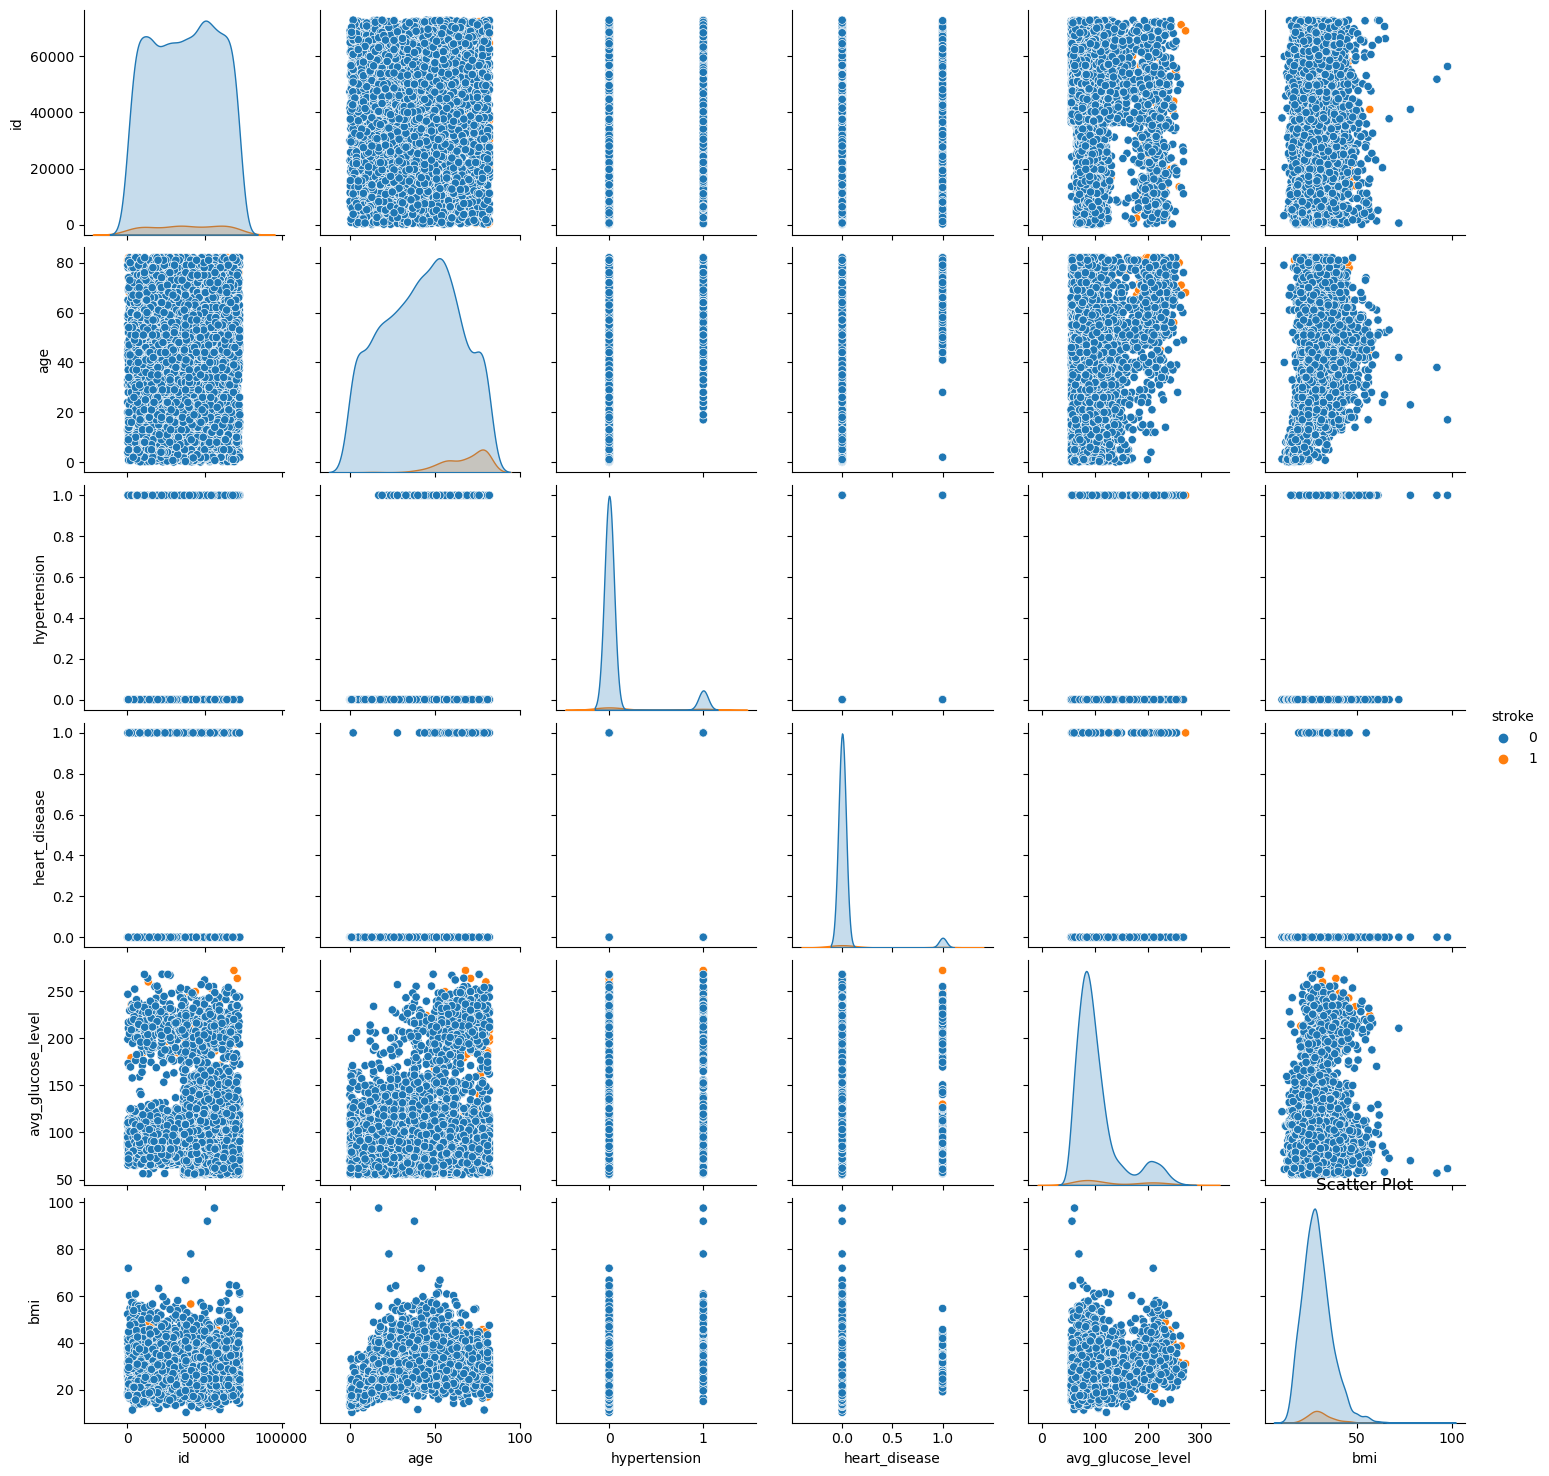

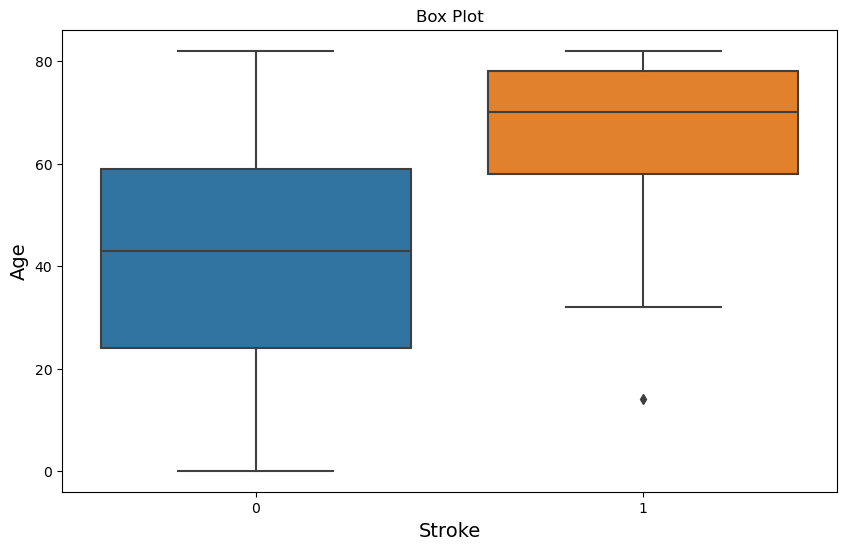

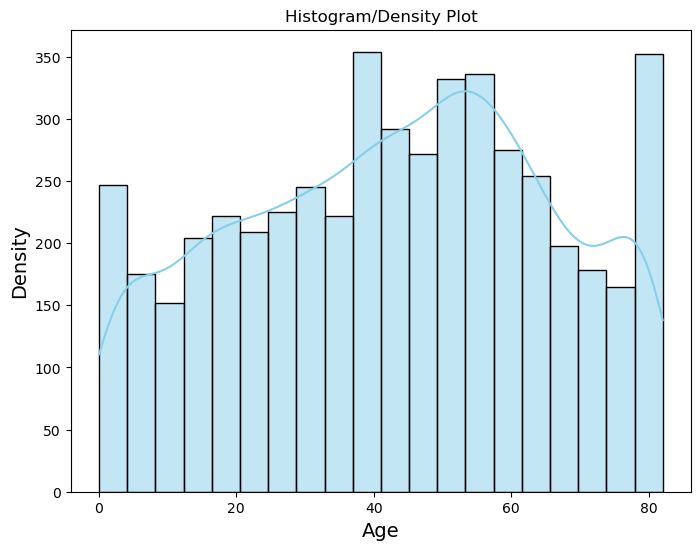

In [9]:
# Plot Scatter Plot
sns.pairplot(data_cleaned, hue='stroke')
plt.title('Scatter Plot')
plt.show()
# Plot Box Plot
plt.figure(figsize=(10, 6))

sns.boxplot(x='stroke', y='age', data=data_cleaned)
plt.title('Box Plot')
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()
# Plot Histogram/Density Plot
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['age'], kde=True, bins=20, color='skyblue')
plt.title('Histogram/Density Plot')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()